In [ ]:
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import numpy as np
# Enable inline plotting
%matplotlib inline


$$\alpha $$

In [138]:
df = pd.read_csv("rts.csv", decimal = '.', header = 0)

In [140]:
closes = df['Last Price'].dropna()
closes=closes[1:].astype(float)

In [141]:
df.columns

Index(['RTSI$ Index', 'Last Price', 'High Price', 'Low Price', 'Volume',
       'Open Price', 'Unnamed: 6', 'SPX Index', 'Last Price.1', 'High Price.1',
       'Low Price.1', 'Volume.1', 'Open Price.1'],
      dtype='object')

In [142]:
import matplotlib.pyplot as plt

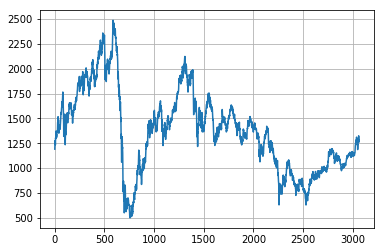

In [143]:
closes.plot(grid=True)

In [144]:
plt.show()

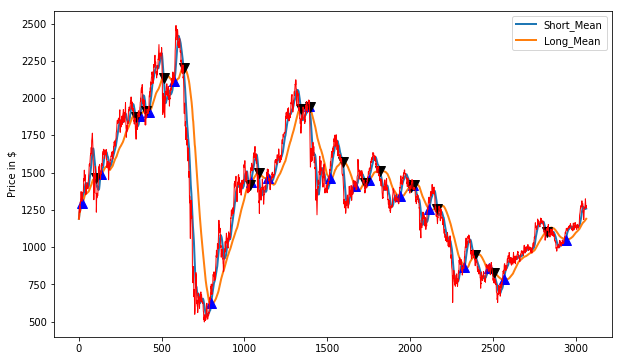

In [187]:
short_window = 20
long_window = 100
signals = pd.DataFrame(index=closes.index)
signals['signal'] = 0.0
signals['Short_Mean'] = closes.rolling(window=short_window, min_periods=1).mean()
signals['Long_Mean'] = closes.rolling(window=long_window, min_periods=1).mean()
signals['signal'][short_window:] = np.where(signals['Short_Mean'][short_window:] 
                                            > signals['Long_Mean'][short_window:], 1.0, 0)   
signals['positions'] = signals['signal'].diff()



fig = plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Price in $')
# plt.plot(Short_Mean, Long_Mean)
# Plot the buy signals
signals[['Short_Mean', 'Long_Mean']].plot(ax=ax1, lw=2., figsize = (10,6))

ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.Short_Mean[signals.positions == 1.0],
         '^', markersize=10, color='b')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.Short_Mean[signals.positions == -1.0],
         'v', markersize=10, color='k')

closes.plot(ax=ax1, color='r', lw=1.)
plt.show()




In [189]:
initial_capital = float(10000.0)
positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions['signal'] = 10*signals['signal']

pos_diff = positions.diff()
portfolio = positions.multiply(closes, axis=0)

portfolio['holdings'] = (positions.multiply(closes, axis=0)).sum(axis=1)


portfolio['cash'] = initial_capital - (pos_diff.multiply(closes, axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

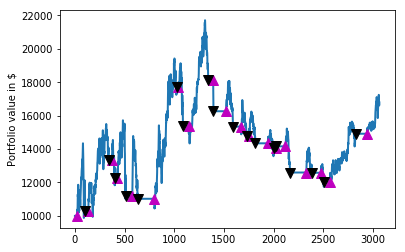

In [192]:
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

501    2330.87
502    2225.46
503    2174.78
504    2159.10
505    1999.83
506    1967.70
507    1890.88
508    1988.23
509    2033.09
510    1978.68
511    2009.71
512    1981.53
513    1906.97
514    1968.97
515    2012.76
516    1966.73
517    1947.19
518    1887.41
519    1870.93
520    1917.61
521    1980.84
522    2004.48
523    2025.14
524    1989.25
525    2026.17
526    2046.80
527    2020.92
528    2065.39
529    2079.72
531    2096.32
532    2096.44
533    2081.51
534    2063.94
535    2032.29
536    2018.88
537    2042.38
538    2050.46
539    2012.65
540    2058.39
541    2079.67
542    2059.35
543    2064.41
544    1990.84
545    2018.76
546    2016.44
547    1946.79
548    1964.65
549    2000.95
550    1993.94
551    1995.19
552    2030.13
553    2049.40
554    2053.93
555    2063.69
556    2069.64
557    2052.84
558    2059.05
559    2103.96
560    2089.77
561    2115.32
Name: Last Price, dtype: float64